In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt 
import hdbcli
from hdbcli import dbapi
import hana_ml

In [2]:
print(hdbcli.__version__)
print(hana_ml.__version__)

2.7.26
2.8.21042100


In [3]:
from hana_ml import dataframe
from hana_ml.dataframe import ConnectionContext

# Read & describe the datasets:

In [4]:
conn = dataframe.ConnectionContext("192.168.0.12", 39015, "ML_DEV", "hanaLEARN1")

In [5]:
store_df = conn.table("Store", schema="INPUT")
store_df.head(5).collect()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270,9,2008,0,NaN,NaN,None
1,2,a,a,570,11,2007,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130,12,2006,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620,9,2009,0,NaN,NaN,None
4,5,a,a,29910,4,2015,0,NaN,NaN,None


In [6]:
train_df = conn.table("Train", schema="INPUT")
train_df.head(5).collect()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,7,26/07/2015,0,0,0,0,0,0
1,1,7,19/07/2015,0,0,0,0,0,0
2,1,7,12/07/2015,0,0,0,0,0,0
3,1,7,05/07/2015,0,0,0,0,0,0
4,1,7,28/06/2015,0,0,0,0,0,0


In [7]:
test_df = conn.table("Test", schema="INPUT")
test_df.head(5).collect()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,10274,3,6,05/09/2015,1,0,0,0
1,10277,9,6,05/09/2015,1,0,0,0
2,10282,14,6,05/09/2015,1,0,0,0
3,10285,19,6,05/09/2015,1,0,0,0
4,10290,24,6,05/09/2015,1,0,0,0


In [9]:
#transform hana_dataframe to pandas dataframes
store_df = store_df.collect()
train_df = train_df.collect()
test_df = test_df.collect()

In [10]:
store_df.describe(include = 'all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


In [11]:
train_df.describe(include = 'all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,05/05/2014,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,986159,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [12]:
train_df['Month'] = train_df['Date'].str.split('/').str[-2]
train_df['Year'] = train_df['Date'].str.split('/').str[-1]
train_df['Day'] = train_df['Date'].str.split('/').str[0]

In [13]:
#describe how many nans per columns are in the dataset
def nans_per_columns(df):
    nans = df.isnull().sum(axis=0)
    nans_percent = 100 * df.isnull().sum() / len(df)
    nans_table = pd.concat([nans, nans_percent], axis=1)
    nans_table_new = nans_table.rename(columns={0: 'Missing Values', 
                                                1: '% of Total Values'})
    return nans_table_new

In [14]:
nans_per_columns(train_df)
#as you can see, nothing to clean here

,Missing Values,% of Total Values
Store,0,0.0
DayOfWeek,0,0.0
Date,0,0.0
Sales,0,0.0
Customers,0,0.0
Open,0,0.0
Promo,0,0.0
StateHoliday,0,0.0
SchoolHoliday,0,0.0
Month,0,0.0


In [15]:
#overview how many nans are in store_df
nans_per_columns(store_df)

,Missing Values,% of Total Values
Store,0,0.000000
StoreType,0,0.000000
Assortment,0,0.000000
CompetitionDistance,3,0.269058
CompetitionOpenSinceMonth,354,31.748879
CompetitionOpenSinceYear,354,31.748879
Promo2,0,0.000000
Promo2SinceWeek,544,48.789238
Promo2SinceYear,544,48.789238
PromoInterval,544,48.789238


# Clean the empty cells (replace/delete)

In [16]:
store_df.loc[store_df["Promo2"] == 0 & store_df['Promo2SinceWeek'].isna() & 
             store_df['Promo2SinceYear'].isna() & store_df['PromoInterval'].isna(),
             ["Promo2SinceWeek", "Promo2SinceYear", "PromoInterval"]]=0
#all the nans came because Promo2=0 -> replace these Nans with 0

In [17]:
#we delete the 3 rows that miss values at CompetitionDistance
store_df_clean = store_df.dropna(subset=["CompetitionDistance"])
#fill in missing data for competitionopen since with the most frequent values
store_df_clean = store_df_clean.fillna(store_df_clean.mode().iloc[0])

# Encode category-variables to integers: 


In [18]:
train_df['StateHoliday'].unique()

def encode_factor(df, colnames):
    for colname in colnames:
        i = 0
        for val in df[colname].unique():
            df.loc[df[colname]== val, colname] = i
            i +=1
        df[colname] = df[colname].astype(int, copy=False)
    print(colname,':','levels:', df[colname].unique(), '; data type :', df[colname].dtype)
 
store_df_clean['PromoInterval'].unique()
encode_factor(store_df_clean,['PromoInterval','StoreType','Assortment'])
encode_factor(train_df,['StateHoliday'])
# for attribute 'Stateholiday' we do the encode:
#0->0, a->1, b->2, c->3, change datatype object to int64
# We do the encoding for attributes: 
#'PromoInterval': 0->0, 'Jan,Apr,Jul,Oct'->1, 
#'Feb,May,Aug,Nov'->2, 'Mar,Jun,Sept,Dec'->3
#'StoreType':a->0,b->1,c->2,d->3
#'Assortment': a->0,b->1,c->2

Assortment : levels: [0 1 2] ; data type : int32
StateHoliday : levels: [0 1 2 3] ; data type : int32


# Merge both datasets:

In [19]:
#set index as store, so that the values of columns from both dataset 
#add information to the right row (the right store)
store_df_clean.set_index('Store', inplace = True)
train_df.set_index('Store', inplace = True)

complete_train_df = store_df_clean.join(train_df, on='Store')
complete_train_df.describe(include = 'all')


,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year,Day
count,1.014567e+06,1.014567e+06,1.014567e+06,1.014567e+06,1.014567e+06,1.014567e+06,1.014567e+06,1.014567e+06,1.014567e+06,1.014567e+06,1014567,1.014567e+06,1.014567e+06,1.014567e+06,1.014567e+06,1.014567e+06,1.014567e+06,1014567,1014567,1014567
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,942,NaN,NaN,NaN,NaN,NaN,NaN,12,3,31
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05/05/2014,NaN,NaN,NaN,NaN,NaN,NaN,03,2013,23
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1112,NaN,NaN,NaN,NaN,NaN,NaN,103416,405879,33398
mean,1.203074e+00,4.801221e-01,5.430086e+03,7.784620e+00,2.010053e+03,5.011202e-01,1.167426e+01,1.008129e+03,8.093877e-01,3.998339e+00,NaN,5.777043e+03,6.336034e+02,8.301137e-01,3.815164e-01,7.438050e-02,1.786634e-01,NaN,NaN,NaN
std,6.802876e-01,5.157082e-01,7.715324e+03,2.781681e+00,5.345596e+00,4.999990e-01,1.533456e+01,1.005874e+03,9.812933e-01,1.997391e+00,NaN,3.851045e+03,4.646482e+02,3.755330e-01,4.857591e-01,4.431639e-01,3.830704e-01,NaN,NaN,NaN
min,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
25%,1.000000e+00,0.000000e+00,7.100000e+02,6.000000e+00,2.008000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,NaN,3.732000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
50%,1.000000e+00,0.000000e+00,2.330000e+03,9.000000e+00,2.012000e+03,1.000000e+00,1.000000e+00,2.009000e+03,1.000000e+00,4.000000e+00,NaN,5.748000e+03,6.100000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
75%,2.000000e+00,1.000000e+00,6.890000e+03,9.000000e+00,2.013000e+03,1.000000e+00,2.200000e+01,2.012000e+03,1.000000e+00,6.000000e+00,NaN,7.859000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN


In [20]:
complete_train_df['Store'] = complete_train_df.index

complete_train_df.head()

,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,...,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year,Day,Store
Store,,,,,,,,,,,,,,,,,,,,,
1,0,0,1270.0,9.0,2008.0,0,0.0,0.0,0,7,...,0,0,0,0,0,0,07,2015,26,1
1,0,0,1270.0,9.0,2008.0,0,0.0,0.0,0,7,...,0,0,0,0,0,0,07,2015,19,1
1,0,0,1270.0,9.0,2008.0,0,0.0,0.0,0,7,...,0,0,0,0,0,0,07,2015,12,1
1,0,0,1270.0,9.0,2008.0,0,0.0,0.0,0,7,...,0,0,0,0,0,0,07,2015,05,1
1,0,0,1270.0,9.0,2008.0,0,0.0,0.0,0,7,...,0,0,0,0,0,0,06,2015,28,1


In [21]:
#tranform datatypes back to numbers
#only numeric can be used for corr
complete_train_df["Store"] = pd.to_numeric(complete_train_df["Store"])
complete_train_df["Month"] = pd.to_numeric(complete_train_df["Month"])
complete_train_df["Year"] = pd.to_numeric(complete_train_df["Year"])
complete_train_df["Day"] = pd.to_numeric(complete_train_df["Day"])
complete_train_df.dtypes


StoreType                      int32
Assortment                     int32
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                  int32
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                   int32
SchoolHoliday                  int64
Month                          int64
Year                           int64
Day                            int64
Store                          int64
dtype: object

# Correlation Analysis:

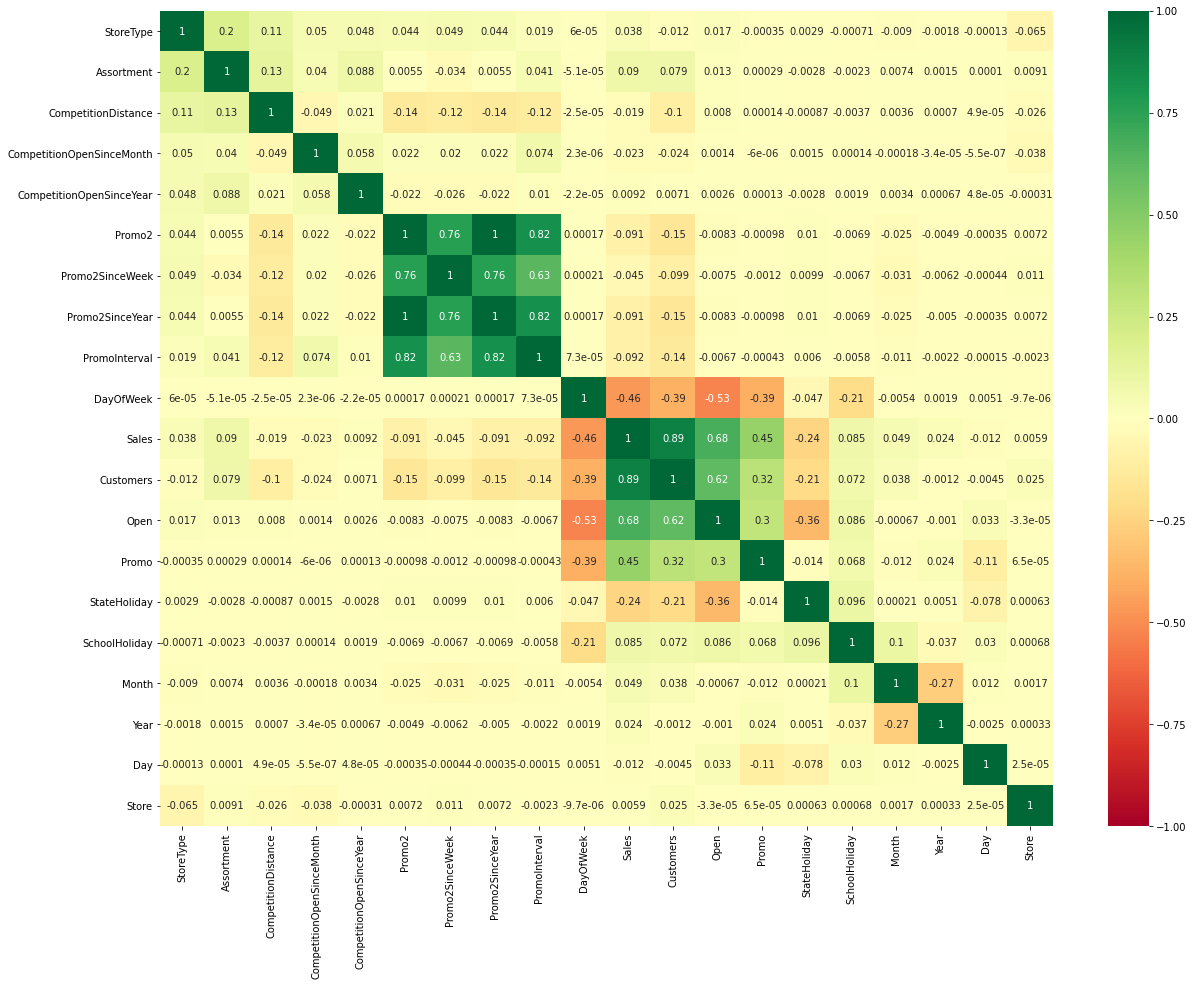

In [22]:
corr_df = complete_train_df.corr()
plt.figure(figsize = (20,15))
sn.heatmap(complete_train_df.corr(), annot=True,vmin=-1, vmax=1, cmap="RdYlGn")

corr_df.to_csv("correlation.csv")

In [23]:
test_df.describe(include='all')

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41088,41077.000000,41088.000000,41088,41088.000000
unique,NaN,NaN,NaN,48,NaN,NaN,2,NaN
top,NaN,NaN,NaN,07/09/2015,NaN,NaN,0,NaN
freq,NaN,NaN,NaN,856,NaN,NaN,40908,NaN
mean,20544.500000,555.899533,3.979167,NaN,0.854322,0.395833,NaN,0.443487
std,11861.228267,320.274496,2.015481,NaN,0.352787,0.489035,NaN,0.496802
min,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,NaN,0.000000
25%,10272.750000,279.750000,2.000000,NaN,1.000000,0.000000,NaN,0.000000
50%,20544.500000,553.500000,4.000000,NaN,1.000000,0.000000,NaN,0.000000
75%,30816.250000,832.250000,6.000000,NaN,1.000000,1.000000,NaN,1.000000


In [24]:
nans_per_columns(test_df)

,Missing Values,% of Total Values
Id,0,0.000000
Store,0,0.000000
DayOfWeek,0,0.000000
Date,0,0.000000
Open,11,0.026772
Promo,0,0.000000
StateHoliday,0,0.000000
SchoolHoliday,0,0.000000


In [25]:
#encode like train was encoded for this feature
encode_factor(test_df,['StateHoliday']) 
test_df["StateHoliday"].value_counts()
#realize that col State Holiday has only 2 types of values

StateHoliday : levels: [0 1] ; data type : int32


0    40908
1      180
Name: StateHoliday, dtype: int64

In [26]:
complete_train_df["StateHoliday"].value_counts()

0    983601
3     20204
1      6672
2      4090
Name: StateHoliday, dtype: int64

In [27]:
#delete the entries from training dataset which are not represented in the test dataset 
complete_train_df = complete_train_df[~complete_train_df['StateHoliday'].isin([2,3])]

# Training - XGBoost

In [28]:
#separate features from target-variables
features=["Store","StoreType","Assortment","CompetitionDistance",
          "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear",
          "Promo2","DayOfWeek", "Promo","StateHoliday",
          "SchoolHoliday", "Day", "Month", "Year"]
features_data,target_data = complete_train_df[features],complete_train_df["Sales"]

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold
from numpy import mean,std

In [30]:
target_data_np=np.array(list(target_data)).reshape(-1, 1)
print(features_data.shape,target_data_np.shape)
X_train, X_test, y_train, y_test = train_test_split(features_data,
                                                    target_data_np,
                                                    test_size=0.30, 
                                                    random_state=42)

(990273, 14) (990273, 1)


In [31]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
model.fit(X_train, y_train, early_stopping_rounds=100,eval_set=[(X_test,y_test)])

[0]	validation_0-rmse:6705.05420
[1]	validation_0-rmse:6416.95117
[2]	validation_0-rmse:6145.41406
[3]	validation_0-rmse:5889.44238
[4]	validation_0-rmse:5648.32422
[5]	validation_0-rmse:5421.50439
[6]	validation_0-rmse:5208.30078
[7]	validation_0-rmse:5007.97314
[8]	validation_0-rmse:4819.15430
[9]	validation_0-rmse:4641.51514
[10]	validation_0-rmse:4474.86328
[11]	validation_0-rmse:4318.67578
[12]	validation_0-rmse:4172.65088
[13]	validation_0-rmse:4036.14331
[14]	validation_0-rmse:3908.89038
[15]	validation_0-rmse:3789.97900
[16]	validation_0-rmse:3679.13135
[17]	validation_0-rmse:3576.07519
[18]	validation_0-rmse:3479.86475
[19]	validation_0-rmse:3390.33813
[20]	validation_0-rmse:3307.73364
[21]	validation_0-rmse:3230.04248
[22]	validation_0-rmse:3157.86792
[23]	validation_0-rmse:3091.66406
[24]	validation_0-rmse:3031.08618
[25]	validation_0-rmse:2971.82544
[26]	validation_0-rmse:2919.33130
[27]	validation_0-rmse:2869.19824
[28]	validation_0-rmse:2822.64380
[29]	validation_0-rmse:2

[238]	validation_0-rmse:1673.35608
[239]	validation_0-rmse:1672.57581
[240]	validation_0-rmse:1671.71594
[241]	validation_0-rmse:1669.63477
[242]	validation_0-rmse:1668.57092
[243]	validation_0-rmse:1668.32239
[244]	validation_0-rmse:1667.58472
[245]	validation_0-rmse:1666.98633
[246]	validation_0-rmse:1666.27930
[247]	validation_0-rmse:1663.36218
[248]	validation_0-rmse:1659.48303
[249]	validation_0-rmse:1658.52161
[250]	validation_0-rmse:1655.87427
[251]	validation_0-rmse:1653.24377
[252]	validation_0-rmse:1653.04443
[253]	validation_0-rmse:1651.14966
[254]	validation_0-rmse:1648.69006
[255]	validation_0-rmse:1646.35693
[256]	validation_0-rmse:1645.50366
[257]	validation_0-rmse:1644.19031
[258]	validation_0-rmse:1643.74243
[259]	validation_0-rmse:1642.50635
[260]	validation_0-rmse:1640.55713
[261]	validation_0-rmse:1640.19531
[262]	validation_0-rmse:1639.44641
[263]	validation_0-rmse:1637.43652
[264]	validation_0-rmse:1636.79211
[265]	validation_0-rmse:1633.06592
[266]	validation_0-r

[473]	validation_0-rmse:1335.66125
[474]	validation_0-rmse:1334.96985
[475]	validation_0-rmse:1332.98596
[476]	validation_0-rmse:1332.14710
[477]	validation_0-rmse:1331.85449
[478]	validation_0-rmse:1331.37891
[479]	validation_0-rmse:1330.82556
[480]	validation_0-rmse:1330.40466
[481]	validation_0-rmse:1329.16419
[482]	validation_0-rmse:1328.97595
[483]	validation_0-rmse:1328.15674
[484]	validation_0-rmse:1326.87219
[485]	validation_0-rmse:1326.74097
[486]	validation_0-rmse:1326.35901
[487]	validation_0-rmse:1325.97131
[488]	validation_0-rmse:1323.62537
[489]	validation_0-rmse:1322.60498
[490]	validation_0-rmse:1321.81006
[491]	validation_0-rmse:1320.85461
[492]	validation_0-rmse:1320.53076
[493]	validation_0-rmse:1318.74756
[494]	validation_0-rmse:1317.16724
[495]	validation_0-rmse:1315.16211
[496]	validation_0-rmse:1314.57336
[497]	validation_0-rmse:1313.42798
[498]	validation_0-rmse:1312.08581
[499]	validation_0-rmse:1310.70044
[500]	validation_0-rmse:1308.88586
[501]	validation_0-r

[708]	validation_0-rmse:1172.40015
[709]	validation_0-rmse:1172.14954
[710]	validation_0-rmse:1171.75806
[711]	validation_0-rmse:1171.72046
[712]	validation_0-rmse:1171.11804
[713]	validation_0-rmse:1170.95154
[714]	validation_0-rmse:1170.10730
[715]	validation_0-rmse:1169.55359
[716]	validation_0-rmse:1168.76074
[717]	validation_0-rmse:1168.61157
[718]	validation_0-rmse:1167.34424
[719]	validation_0-rmse:1166.48706
[720]	validation_0-rmse:1166.20215
[721]	validation_0-rmse:1165.52344
[722]	validation_0-rmse:1164.74316
[723]	validation_0-rmse:1164.54040
[724]	validation_0-rmse:1163.79700
[725]	validation_0-rmse:1163.56311
[726]	validation_0-rmse:1163.15344
[727]	validation_0-rmse:1162.81494
[728]	validation_0-rmse:1162.73144
[729]	validation_0-rmse:1162.39856
[730]	validation_0-rmse:1161.99634
[731]	validation_0-rmse:1161.61902
[732]	validation_0-rmse:1161.27063
[733]	validation_0-rmse:1161.01501
[734]	validation_0-rmse:1160.45532
[735]	validation_0-rmse:1159.92859
[736]	validation_0-r

[943]	validation_0-rmse:1076.01416
[944]	validation_0-rmse:1075.52478
[945]	validation_0-rmse:1075.29236
[946]	validation_0-rmse:1074.42126
[947]	validation_0-rmse:1074.10864
[948]	validation_0-rmse:1073.88904
[949]	validation_0-rmse:1073.11487
[950]	validation_0-rmse:1072.76648
[951]	validation_0-rmse:1072.56213
[952]	validation_0-rmse:1072.32910
[953]	validation_0-rmse:1072.08936
[954]	validation_0-rmse:1071.81397
[955]	validation_0-rmse:1071.74048
[956]	validation_0-rmse:1071.45654
[957]	validation_0-rmse:1070.93103
[958]	validation_0-rmse:1070.41650
[959]	validation_0-rmse:1069.85608
[960]	validation_0-rmse:1069.37622
[961]	validation_0-rmse:1068.98621
[962]	validation_0-rmse:1068.57764
[963]	validation_0-rmse:1068.49902
[964]	validation_0-rmse:1068.00415
[965]	validation_0-rmse:1067.64380
[966]	validation_0-rmse:1067.25574
[967]	validation_0-rmse:1066.92053
[968]	validation_0-rmse:1066.64502
[969]	validation_0-rmse:1066.47998
[970]	validation_0-rmse:1066.08936
[971]	validation_0-r

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
score = model.score(X_train, y_train)  
print("Training score: ", score)

Training score:  0.9243306465384156


In [33]:
y_prediction = model.predict(X_test)

In [34]:
cv = KFold(n_splits=10, shuffle=True)
scores = cross_val_score(model, X_test, np.ravel(y_test), cv= cv)
print("K-fold CV average score: %.2f" % scores.mean())

K-fold CV average score: 0.92


In [35]:
mae = mean_absolute_error(y_test, y_prediction)
print("MAE: %.2f" % mae)

MAE: 714.50


In [36]:
numpy_data = np.array(X_test)
df_acc_pred = pd.DataFrame(data=numpy_data, columns=features)
df_acc_pred["predicted"] = y_prediction
df_acc_pred["actual"] = y_test
df_acc_pred.to_csv("predictions_actuals_final_model_xgboost_v1.csv", index = False)

df = df_acc_pred.loc[df_acc_pred["actual"] != 0]
mape = 100 * ((df["actual"] - df["predicted"])/ df["actual"])
accuracy = 100 - abs(np.mean(mape))
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 96.54 %.


In [37]:
df_acc_pred.head()


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,DayOfWeek,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,predicted,actual
0,928.0,2.0,1.0,1090.0,9.0,2013.0,1.0,1.0,1.0,0.0,0.0,3.0,2.0,2014.0,10252.380859,15407
1,902.0,1.0,0.0,310.0,5.0,2015.0,1.0,6.0,0.0,0.0,0.0,9.0,2.0,2013.0,3993.657227,4950
2,10.0,1.0,0.0,3160.0,9.0,2009.0,0.0,3.0,1.0,0.0,0.0,12.0,11.0,2014.0,5626.571777,6226
3,145.0,1.0,0.0,280.0,9.0,2013.0,1.0,2.0,0.0,0.0,0.0,11.0,2.0,2014.0,5900.937500,6781
4,209.0,1.0,1.0,11680.0,9.0,2011.0,1.0,3.0,1.0,0.0,1.0,16.0,4.0,2014.0,7219.537598,6913


# Training - Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(features_data, 
                                                                target_data_np, 
                                                                test_size=0.30, 
                                                                random_state=42)

regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_rf, y_train_rf)
y_pred_rf = regressor.predict(X_test_rf)

<ipython-input-38-d8bb73c52737>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train_rf, y_train_rf)


In [39]:
numpy_data = np.array(X_test_rf)
df_acc_pred = pd.DataFrame(data=numpy_data, columns=features)
df_acc_pred["predicted"] = y_pred_rf
df_acc_pred["actual"] = y_test_rf
df_acc_pred.to_csv("predictions_actuals_rf_v1.csv", index = False)

# Calculate mean absolute percentage error (MAPE)
df = df_acc_pred.loc[df_acc_pred["actual"] != 0]
mape = 100 * ((df["actual"] - df["predicted"])/ df["actual"])
accuracy = 100 - abs(np.mean(mape))
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.5 %.


In [40]:
df_acc_pred.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,DayOfWeek,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,predicted,actual
0,928.0,2.0,1.0,1090.0,9.0,2013.0,1.0,1.0,1.0,0.0,0.0,3.0,2.0,2014.0,11943.71,15407
1,902.0,1.0,0.0,310.0,5.0,2015.0,1.0,6.0,0.0,0.0,0.0,9.0,2.0,2013.0,4980.92,4950
2,10.0,1.0,0.0,3160.0,9.0,2009.0,0.0,3.0,1.0,0.0,0.0,12.0,11.0,2014.0,6091.38,6226
3,145.0,1.0,0.0,280.0,9.0,2013.0,1.0,2.0,0.0,0.0,0.0,11.0,2.0,2014.0,6090.38,6781
4,209.0,1.0,1.0,11680.0,9.0,2011.0,1.0,3.0,1.0,0.0,1.0,16.0,4.0,2014.0,7555.28,6913


# Prediction for the new Test dataset 

In [41]:
 #similar steps as for training dataset
test_df['Month'] = test_df['Date'].str.split('/').str[-2]
test_df['Year'] = test_df['Date'].str.split('/').str[-1]
test_df['Day'] = test_df['Date'].str.split('/').str[0]

test_df = test_df.drop(columns = ['Date'])
test_df.set_index('Store', inplace = True)

In [42]:
#enhance with data from store dataset same as training dataset was
complete_test_df = test_df.join(store_df_clean, on='Store')
complete_test_df["Store"] = complete_test_df.index
complete_test_df["Month"] = pd.to_numeric(complete_test_df["Month"])
complete_test_df["Year"] = pd.to_numeric(complete_test_df["Year"])
complete_test_df["Day"] = pd.to_numeric(complete_test_df["Day"])
#new variable test_data because we need to keep the ID column for later recognition of the results
test_data = complete_test_df[features] 
test_data.describe()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,DayOfWeek,Promo,StateHoliday,SchoolHoliday,Day,Month,Year
count,41088.000000,40992.000000,40992.000000,40992.000000,40992.000000,40992.000000,40992.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.0
mean,555.899533,1.266979,0.516393,5088.583138,7.759953,2010.249415,0.580796,3.979167,0.395833,0.004381,0.443487,13.520833,8.354167,2015.0
std,320.274496,0.657454,0.520399,7225.487467,2.670846,5.843248,0.493435,2.015481,0.489035,0.066044,0.496802,8.448450,0.478266,0.0
min,1.000000,0.000000,0.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,8.000000,2015.0
25%,279.750000,1.000000,0.000000,720.000000,6.000000,2008.000000,0.000000,2.000000,0.000000,0.000000,0.000000,6.750000,8.000000,2015.0
50%,553.500000,1.000000,1.000000,2425.000000,9.000000,2013.000000,1.000000,4.000000,0.000000,0.000000,0.000000,12.500000,8.000000,2015.0
75%,832.250000,2.000000,1.000000,6480.000000,9.000000,2013.000000,1.000000,6.000000,1.000000,0.000000,1.000000,19.250000,9.000000,2015.0
max,1115.000000,3.000000,2.000000,75860.000000,12.000000,2015.000000,1.000000,7.000000,1.000000,1.000000,1.000000,31.000000,9.000000,2015.0


In [43]:
#there are missing values !!!!
nans_per_columns(test_data) 

,Missing Values,% of Total Values
Store,0,0.000000
StoreType,96,0.233645
Assortment,96,0.233645
CompetitionDistance,96,0.233645
CompetitionOpenSinceMonth,96,0.233645
CompetitionOpenSinceYear,96,0.233645
Promo2,96,0.233645
DayOfWeek,0,0.000000
Promo,0,0.000000
StateHoliday,0,0.000000


In [44]:
#we use the XGBoost model because it does not have any problem predicting 
y_test_prediction = model.predict(test_data)

In [45]:
result = pd.DataFrame(data=test_data, columns=features)
result["ID"] = complete_test_df["Id"]
result["PredictedSales"] = y_test_prediction

In [46]:
result.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,DayOfWeek,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,ID,PredictedSales
Store,,,,,,,,,,,,,,,,
3,3,1.0,0.0,14130.0,12.0,2006.0,1.0,6,0,0,0,5,9,2015,10274,3929.321533
9,9,1.0,1.0,2030.0,8.0,2000.0,0.0,6,0,0,0,5,9,2015,10277,5788.236816
14,14,1.0,0.0,1300.0,3.0,2014.0,1.0,6,0,0,0,5,9,2015,10282,3661.367920
19,19,1.0,1.0,3240.0,9.0,2013.0,1.0,6,0,0,0,5,9,2015,10285,4793.394043
24,24,1.0,1.0,4590.0,3.0,2000.0,1.0,6,0,0,0,5,9,2015,10290,7221.581055


In [47]:
result.to_csv("result_python_model_v1.csv", index = False)